In [596]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bank_Dataset

In [597]:
miss_values = ['nonexistent','unknown', np.nan]

In [598]:
bank_filepath1 = r'C:\Users\Asus\Documents\Internship\classification final\classification\Bank_dataset (2)\Bank_file1.xlsx'

In [599]:
bank_df1 = pd.read_excel(bank_filepath1, na_values=miss_values)

In [600]:
bank_df1.head()

,ID,age,job,marital,education
0,C1,30,blue-collar,married,basic.9y
1,C2,39,services,single,high.school
2,C3,25,services,married,high.school
3,C4,38,services,married,basic.9y
4,C5,47,admin.,married,university.degree


In [601]:
bank_filepath2 = r'C:\Users\Asus\Documents\Internship\classification final\classification\Bank_dataset (2)\Bank_file2.xlsx'

In [602]:
bank_df2 = pd.read_excel(bank_filepath2, na_values=miss_values)

In [603]:
bank_df2.head()

,ID,default,housing,loan,contact,month
0,C1,no,yes,no,cellular,may
1,C2,no,no,no,telephone,may
2,C3,no,yes,no,telephone,jun
3,C4,no,NaN,NaN,telephone,jun
4,C5,no,yes,no,cellular,nov


In [604]:
bank_filepath3 = r'C:\Users\Asus\Documents\Internship\classification final\classification\Bank_dataset (2)\Bank_file3.xlsx'

In [605]:
bank_df3 = pd.read_excel(bank_filepath3, na_values=miss_values)

In [606]:
bank_df3.head()

,ID,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,C1,fri,487,2,999,0,NaN,-1.8,92.893,-46.2,1.313,5099.1
1,C2,fri,346,4,999,0,NaN,1.1,93.994,-36.4,4.855,5191.0
2,C3,wed,227,1,999,0,NaN,1.4,94.465,-41.8,4.962,5228.1
3,C4,fri,17,3,999,0,NaN,1.4,94.465,-41.8,4.959,5228.1
4,C5,mon,58,1,999,0,NaN,-0.1,93.200,-42.0,4.191,5195.8


In [607]:
bank_filepath4 = r'C:\Users\Asus\Documents\Internship\classification final\classification\Bank_dataset (2)\Bank_target file.xlsx'

In [608]:
bank_df4 = pd.read_excel(bank_filepath4, na_values=miss_values)

In [609]:
bank_df4.head()

,ID,approved
0,C1,no
1,C2,no
2,C3,no
3,C4,no
4,C5,no


In [610]:
print("bank_df1 ---->  ",bank_df1.shape)
print("bank_df2 ---->  ",bank_df2.shape)
print("bank_df3 ---->  ",bank_df3.shape)
print("bank_df4 ---->  ",bank_df4.shape)

bank_df1 ---->   (4119, 5)
bank_df2 ---->   (4119, 6)
bank_df3 ---->   (4119, 12)
bank_df4 ---->   (4119, 2)


In [611]:
merged_bank_df = pd.merge(bank_df1, bank_df2, on='ID')
merged_bank_df = pd.merge(merged_bank_df, bank_df3, on='ID')
merged_bank_df = pd.merge(merged_bank_df, bank_df4, on='ID')

In [612]:
merged_bank_df.head()

,ID,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,approved
0,C1,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,...,2,999,0,NaN,-1.8,92.893,-46.2,1.313,5099.1,no
1,C2,39,services,single,high.school,no,no,no,telephone,may,...,4,999,0,NaN,1.1,93.994,-36.4,4.855,5191.0,no
2,C3,25,services,married,high.school,no,yes,no,telephone,jun,...,1,999,0,NaN,1.4,94.465,-41.8,4.962,5228.1,no
3,C4,38,services,married,basic.9y,no,NaN,NaN,telephone,jun,...,3,999,0,NaN,1.4,94.465,-41.8,4.959,5228.1,no
4,C5,47,admin.,married,university.degree,no,yes,no,cellular,nov,...,1,999,0,NaN,-0.1,93.200,-42.0,4.191,5195.8,no


In [613]:
merged_bank_df.shape

(4119, 22)

In [614]:
merged_bank_df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'approved'],
      dtype='object')

In [615]:
merged_bank_df.isnull().sum()

ID                   0
age                  0
job                 39
marital             11
education          167
default            803
housing            105
loan               105
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome          3523
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
approved             0
dtype: int64

In [616]:
merged_bank_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [617]:
merged_bank_df['approved'].unique()

array(['no', 'yes'], dtype=object)

In [618]:
merged_bank_df['approved'].value_counts()

no     3668
yes     451
Name: approved, dtype: int64

In [619]:
for i in merged_bank_df:
  print('\n',"************",i,"**************",'\n',merged_bank_df[i].unique())


 ************ ID ************** 
 ['C1' 'C2' 'C3' ... 'C4117' 'C4118' 'C4119']

 ************ age ************** 
 [30 39 25 38 47 32 41 31 35 36 29 27 44 46 45 50 55 40 28 34 33 51 48 20
 76 56 24 58 60 37 52 42 49 54 59 57 43 53 75 82 71 21 22 23 26 81 61 67
 73 18 64 74 77 86 85 63 88 78 72 68 80 66 19 62 65 69 70]

 ************ job ************** 
 ['blue-collar' 'services' 'admin.' 'entrepreneur' 'self-employed'
 'technician' 'management' 'student' 'retired' 'housemaid' 'unemployed'
 nan]

 ************ marital ************** 
 ['married' 'single' 'divorced' nan]

 ************ education ************** 
 ['basic.9y' 'high.school' 'university.degree' 'professional.course'
 'basic.6y' 'basic.4y' nan 'illiterate']

 ************ default ************** 
 ['no' nan 'yes']

 ************ housing ************** 
 ['yes' 'no' nan]

 ************ loan ************** 
 ['no' nan 'yes']

 ************ contact ************** 
 ['cellular' 'telephone']

 ************ month ************** 
 [

In [620]:
merged_bank_df.loc[merged_bank_df['poutcome']=='nonexistent']

,ID,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,approved


In [621]:
merged_bank_df.loc[merged_bank_df['job']=='unknown']


,ID,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,approved


In [622]:
merged_bank_df.loc[merged_bank_df['marital']=='unknown']

,ID,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,approved


In [623]:
merged_bank_df.loc[merged_bank_df['default']=='unknown']

,ID,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,approved


In [624]:
merged_bank_df.loc[merged_bank_df['housing']=='unknown']

,ID,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,approved


In [625]:
merged_bank_df.loc[merged_bank_df['loan']=='unknown']

,ID,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,approved


In [626]:
merged_bank_df.loc[merged_bank_df['pdays']==999]

,ID,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,approved
0,C1,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,...,2,999,0,NaN,-1.8,92.893,-46.2,1.313,5099.1,no
1,C2,39,services,single,high.school,no,no,no,telephone,may,...,4,999,0,NaN,1.1,93.994,-36.4,4.855,5191.0,no
2,C3,25,services,married,high.school,no,yes,no,telephone,jun,...,1,999,0,NaN,1.4,94.465,-41.8,4.962,5228.1,no
3,C4,38,services,married,basic.9y,no,NaN,NaN,telephone,jun,...,3,999,0,NaN,1.4,94.465,-41.8,4.959,5228.1,no
4,C5,47,admin.,married,university.degree,no,yes,no,cellular,nov,...,1,999,0,NaN,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,C4115,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,...,1,999,0,NaN,1.4,93.918,-42.7,4.958,5228.1,no
4115,C4116,39,admin.,married,high.school,no,yes,no,telephone,jul,...,1,999,0,NaN,1.4,93.918,-42.7,4.959,5228.1,no
4116,C4117,27,student,single,high.school,no,no,no,cellular,may,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,C4118,58,admin.,married,high.school,no,no,no,cellular,aug,...,1,999,0,NaN,1.4,93.444,-36.1,4.966,5228.1,no


In [627]:
num_cols = list(merged_bank_df.select_dtypes(include=['int','float']).columns)
cat_cols = list(merged_bank_df.select_dtypes(exclude=['int', 'float']).columns)

In [628]:
num_cols

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [629]:
cat_cols

['ID',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'approved']

In [630]:
merged_bank_df.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.041299,-0.014169,-0.043425,0.050931,-0.019192,-0.000482,0.098135,-0.015033,-0.041936
duration,0.041299,1.000000,-0.085348,-0.046998,0.025724,-0.028848,0.016672,-0.034745,-0.032329,-0.044218
campaign,-0.014169,-0.085348,1.000000,0.058742,-0.091490,0.176079,0.145021,0.007882,0.159435,0.161037
pdays,-0.043425,-0.046998,0.058742,1.000000,-0.587941,0.270684,0.058472,-0.092090,0.301478,0.381983
previous,0.050931,0.025724,-0.091490,-0.587941,1.000000,-0.415238,-0.164922,-0.051420,-0.458851,-0.514853
emp.var.rate,-0.019192,-0.028848,0.176079,0.270684,-0.415238,1.000000,0.755155,0.195022,0.970308,0.897173
cons.price.idx,-0.000482,0.016672,0.145021,0.058472,-0.164922,0.755155,1.000000,0.045835,0.657159,0.472560
cons.conf.idx,0.098135,-0.034745,0.007882,-0.092090,-0.051420,0.195022,0.045835,1.000000,0.276595,0.107054
euribor3m,-0.015033,-0.032329,0.159435,0.301478,-0.458851,0.970308,0.657159,0.276595,1.000000,0.942589
nr.employed,-0.041936,-0.044218,0.161037,0.381983,-0.514853,0.897173,0.472560,0.107054,0.942589,1.000000


In [631]:
merged_bank_df = merged_bank_df.drop(['ID', 'marital', 'education', 'contact', 'month', 'day_of_week', 'duration'], axis=1)

In [632]:
merged_bank_df['job'] = merged_bank_df['job'].fillna(merged_bank_df['job'].mode()[0])
merged_bank_df['default'] = merged_bank_df['default'].fillna(merged_bank_df['default'].mode()[0])
merged_bank_df['housing'] = merged_bank_df['housing'].fillna(merged_bank_df['housing'].mode()[0])
merged_bank_df['loan'] = merged_bank_df['loan'].fillna(merged_bank_df['loan'].mode()[0])
merged_bank_df['poutcome'] = merged_bank_df['poutcome'].fillna(merged_bank_df['poutcome'].mode()[0])

In [633]:
merged_bank_df.isnull().sum()

age               0
job               0
default           0
housing           0
loan              0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
approved          0
dtype: int64

In [634]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

cols_to_encode = ['job', 'default','housing', 'loan', 'poutcome', 'approved']

# Perform one-hot encoding on categorical columns
encoder = OneHotEncoder()
encoded = encoder.fit_transform(merged_bank_df[cols_to_encode]).toarray()
encoded_cols = pd.DataFrame(encoded, columns=encoder.get_feature_names(cols_to_encode))

# Add encoded columns to the original dataframe and drop the original categorical columns
merged_bank_df = pd.concat([merged_bank_df, encoded_cols], axis=1)
merged_bank_df.drop(cols_to_encode, axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [635]:
merged_bank_df.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_success,approved_no,approved_yes
0,30,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,39,4,999,0,1.1,93.994,-36.4,4.855,5191.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,25,1,999,0,1.4,94.465,-41.8,4.962,5228.1,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,38,3,999,0,1.4,94.465,-41.8,4.959,5228.1,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,47,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


In [636]:
merged_bank_df.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'poutcome_failure', 'poutcome_success', 'approved_no', 'approved_yes'],
      dtype='object')

In [637]:
merged_bank_df = merged_bank_df.drop(['job_admin.', 'default_no', 'housing_no', 'loan_no', 'poutcome_failure', 'approved_no'], axis=1)

<AxesSubplot:>

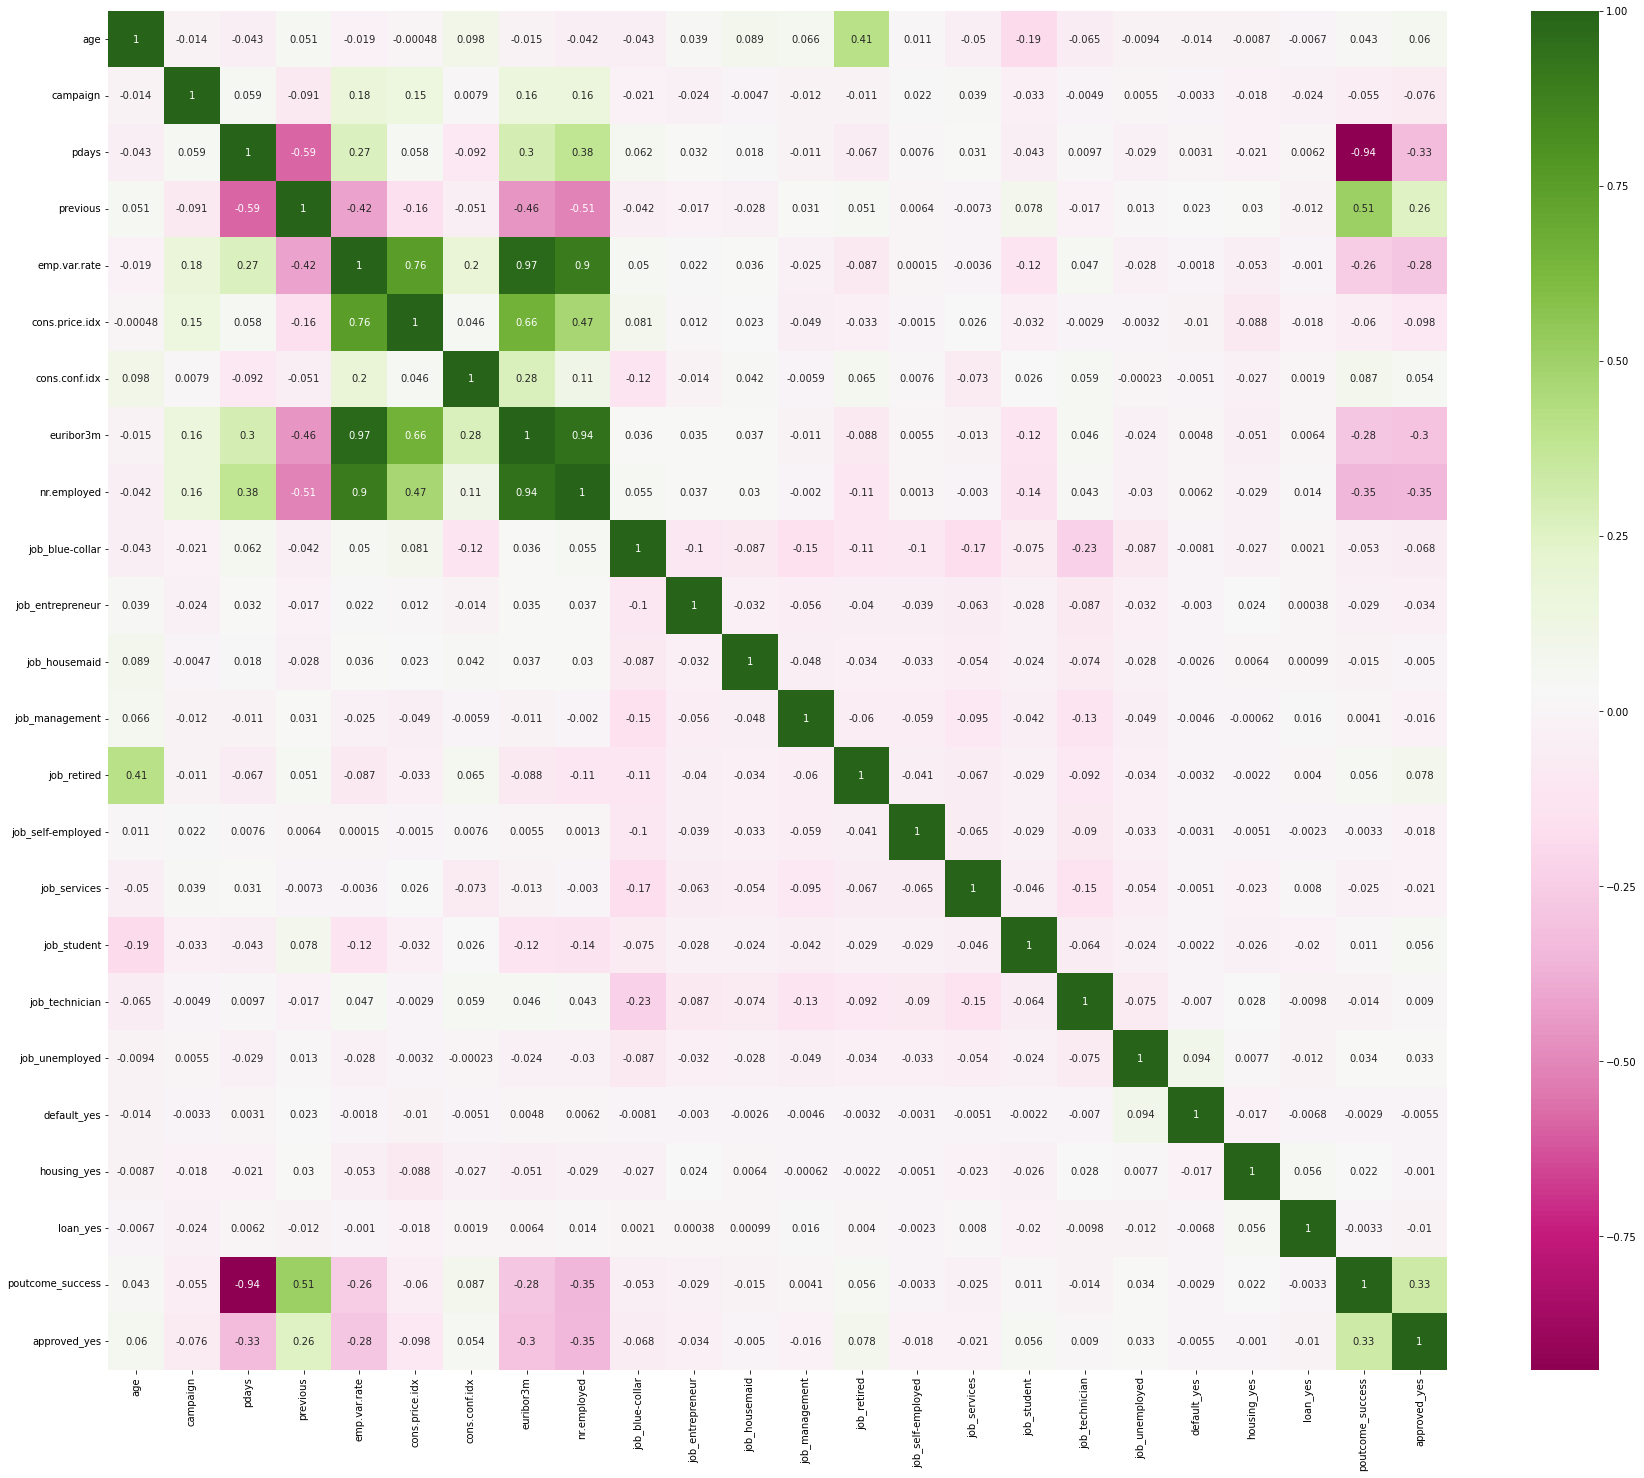

In [638]:
import seaborn as sns

plt.figure(figsize=(30,25))
sns.heatmap(merged_bank_df.corr(), annot=True, cmap='PiYG')

In [639]:
corr_matrix = merged_bank_df.corr().abs()
corr_matrix

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,default_yes,housing_yes,loan_yes,poutcome_success,approved_yes
age,1.000000,0.014169,0.043425,0.050931,0.019192,0.000482,0.098135,0.015033,0.041936,0.042976,...,0.010991,0.050379,0.185453,0.064930,0.009394,0.013772,0.008669,0.006690,0.043341,0.060374
campaign,0.014169,1.000000,0.058742,0.091490,0.176079,0.145021,0.007882,0.159435,0.161037,0.021404,...,0.021876,0.038893,0.032527,0.004871,0.005467,0.003260,0.017871,0.024226,0.054564,0.076091
pdays,0.043425,0.058742,1.000000,0.587941,0.270684,0.058472,0.092090,0.301478,0.381983,0.062240,...,0.007591,0.031058,0.043072,0.009654,0.028664,0.003133,0.021343,0.006231,0.940565,0.332012
previous,0.050931,0.091490,0.587941,1.000000,0.415238,0.164922,0.051420,0.458851,0.514853,0.041762,...,0.006366,0.007326,0.078260,0.017419,0.013485,0.023291,0.029777,0.011662,0.510865,0.255697
emp.var.rate,0.019192,0.176079,0.270684,0.415238,1.000000,0.755155,0.195022,0.970308,0.897173,0.050353,...,0.000153,0.003592,0.116507,0.047053,0.028425,0.001844,0.052881,0.001016,0.256587,0.283216
cons.price.idx,0.000482,0.145021,0.058472,0.164922,0.755155,1.000000,0.045835,0.657159,0.472560,0.080969,...,0.001529,0.025988,0.032322,0.002939,0.003210,0.010214,0.087778,0.018158,0.060257,0.098326
cons.conf.idx,0.098135,0.007882,0.092090,0.051420,0.195022,0.045835,1.000000,0.276595,0.107054,0.122025,...,0.007642,0.073024,0.025850,0.058946,0.000228,0.005091,0.027442,0.001911,0.087382,0.054393
euribor3m,0.015033,0.159435,0.301478,0.458851,0.970308,0.657159,0.276595,1.000000,0.942589,0.036495,...,0.005542,0.012849,0.119714,0.046468,0.023823,0.004780,0.050651,0.006409,0.282272,0.298565
nr.employed,0.041936,0.161037,0.381983,0.514853,0.897173,0.472560,0.107054,0.942589,1.000000,0.055241,...,0.001342,0.002975,0.144023,0.042848,0.030453,0.006203,0.028699,0.014115,0.354030,0.349241
job_blue-collar,0.042976,0.021404,0.062240,0.041762,0.050353,0.080969,0.122025,0.036495,0.055241,1.000000,...,0.104747,0.169771,0.074502,0.234697,0.086993,0.008146,0.026553,0.002059,0.053400,0.067781


In [640]:
# Find index of feature columns with correlation greater than 0.7
high_corr_cols = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                  .stack().sort_values(ascending=False)
                  .where(lambda x: x > 0.7).dropna().reset_index().iloc[:, [0, 1]])

# Get names of highly correlated columns
high_corr_cols = list(set(high_corr_cols.iloc[:, 0]).union(set(high_corr_cols.iloc[:, 1])))

In [641]:
high_corr_cols

['poutcome_success',
 'cons.price.idx',
 'euribor3m',
 'pdays',
 'emp.var.rate',
 'nr.employed']

In [642]:
# Remove highly correlated columns from the dataframe
merged_bank_df.drop(high_corr_cols, axis=1, inplace=True)

In [643]:
merged_bank_df.head()

,age,campaign,previous,cons.conf.idx,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,default_yes,housing_yes,loan_yes,approved_yes
0,30,2,0,-46.2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,39,4,0,-36.4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,25,1,0,-41.8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,38,3,0,-41.8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,47,1,0,-42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [644]:
merged_bank_df.shape

(4119, 18)

In [645]:
corr = merged_bank_df.corr()['approved_yes']
corr

age                  0.060374
campaign            -0.076091
previous             0.255697
cons.conf.idx        0.054393
job_blue-collar     -0.067781
job_entrepreneur    -0.034275
job_housemaid       -0.005036
job_management      -0.015814
job_retired          0.078373
job_self-employed   -0.017796
job_services        -0.021253
job_student          0.055781
job_technician       0.009032
job_unemployed       0.032872
default_yes         -0.005464
housing_yes         -0.001006
loan_yes            -0.010169
approved_yes         1.000000
Name: approved_yes, dtype: float64

In [646]:
# Remove columns with correlation less than 1% and greater than zero
remove_cols = corr[(corr < 0.01) & (corr > 0)].index
remove_cols

Index(['job_technician'], dtype='object')

In [647]:
merged_bank_df = merged_bank_df.drop(remove_cols, axis=1)

In [648]:
merged_bank_df.shape

(4119, 17)

In [649]:
# Define a function to calculate Gini impurity
def gini_impurity(labels):
    classes = np.unique(labels)
    impurity = 1
    for c in classes:
        p = np.sum(labels == c) / len(labels)
        impurity -= p ** 2
    return impurity

# Define a function to split the data based on a feature and threshold
def split_data(X, y, feature, threshold):
    left_indices = np.where(X[:, feature] <= threshold)[0]           
    right_indices = np.where(X[:, feature] > threshold)[0]
    X_left, y_left = X[left_indices], y[left_indices]
    X_right, y_right = X[right_indices], y[right_indices]
    return X_left, y_left, X_right, y_right

# Define a function to find the best split for a given node
def find_best_split(X, y):
    best_feature, best_threshold, best_impurity = None, None, 1
    for feature in range(X.shape[1]):
        thresholds = np.unique(X[:, feature])
        for threshold in thresholds:
            X_left, y_left, X_right, y_right = split_data(X, y, feature, threshold)
            impurity = (len(y_left) / len(y)) * gini_impurity(y_left) + (len(y_right) / len(y)) * gini_impurity(y_right)
            if impurity < best_impurity:
                best_feature, best_threshold, best_impurity = feature, threshold, impurity
    return best_feature, best_threshold


In [656]:
# Define a class for the decision tree
class Node:
    def __init__(self, X, y, depth, max_depth, min_samples_leaf):
        self.X = X
        self.y = y
        self.depth = depth
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.left = None
        self.right = None
        self.feature = None
        self.threshold = None
        self.label = None

    def split(self):    # Splits the input data and labels into two subsets based on the best feature and threshold 
        self.feature, self.threshold = find_best_split(self.X, self.y)
        X_left, y_left, X_right, y_right = split_data(self.X, self.y, self.feature, self.threshold)
        if len(y_left) > 0 and len(y_right) > 0 and self.depth < self.max_depth:
            self.left = Node(X_left, y_left, self.depth + 1, self.max_depth, min_samples_leaf)
            self.right = Node(X_right, y_right, self.depth + 1, self.max_depth, min_samples_leaf)

    def predict(self, x):  #Given a new data point x, traverses the tree to predict the class label for x.
        if self.label is not None:
            return self.label
        if x[self.feature] <= self.threshold:
            return self.left.predict(x)
        else:
            return self.right.predict(x)
            

    def fit(self): #trains the decision tree by recursively splitting the data and labels until the stopping criteria are met.
        if len(np.unique(self.y)) == 1: #If all the elements in the target variable y are the same .This node becomes a leaf node
            self.label = self.y[0]
            return
        if self.depth == self.max_depth:
            self.label = np.bincount(self.y.astype(int)).argmax()  #return the index of the highest count.
            return
        if len(y) < self.min_samples_leaf:
            self.label = np.bincount(self.y.astype(int)).argmax()
            return
        self.split()
        if self.left is not None:
            self.left.fit()
        if self.right is not None:
            self.right.fit()


In [657]:
X = merged_bank_df.drop(['approved_yes'], axis=1).values
y = merged_bank_df['approved_yes'].values

In [658]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [659]:
print(X)

[[0.17142857 0.02941176 0.         ... 0.         1.         0.        ]
 [0.3        0.08823529 0.         ... 0.         0.         0.        ]
 [0.1        0.         0.         ... 0.         1.         0.        ]
 ...
 [0.12857143 0.02941176 0.16666667 ... 0.         0.         0.        ]
 [0.57142857 0.         0.         ... 0.         0.         0.        ]
 [0.22857143 0.         0.         ... 0.         1.         0.        ]]


In [660]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [661]:
# Build the decision tree
min_samples_leaf = 5
tree = Node(X_train, y_train, 0, 10, min_samples_leaf)
tree.fit()

# Define a function to calculate the accuracy of the model
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Predict the classes of the test data

y_train_pred = np.array([tree.predict(x) for x in X_train])
y_test_pred = np.array([tree.predict(x) for x in X_test])

# Calculate the accuracy of the model
print('Accuracy-->X_Train Data:', accuracy(y_train, y_train_pred))
print('Accuracy-->X_Test Data:', accuracy(y_test, y_test_pred)) 


Accuracy-->X_Train Data: 0.932928679817906
Accuracy-->X_Test Data: 0.8822815533980582


In [662]:
# Define a function to calculate recall for a multiclass problem with 3 classes
def recall(y_true, y_pred):
    classes = np.unique(y_true)
    recall_list = []
    for c in classes:
        tp = np.sum((y_true == c) & (y_pred == c))
        fn = np.sum((y_true == c) & (y_pred != c))
        recall = tp / (tp + fn)
        recall_list.append(recall)
    return recall_list

# Calculate the recall of the model
print('Recall-->X_Train Data:', recall(y_train, y_train_pred))

Recall-->X_Train Data: [0.9962534059945504, 0.415041782729805]
